In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import sklearn.model_selection
from HW1.logit import Logit

In [2]:
def read_dataset(path):
    data = pd.read_csv(path)
    X = data.iloc[:,:-1].values
    y = data.iloc[:, -1].apply(lambda c: 1 if c == 'P' else -1).values
    return X, y

In [3]:
def calc_f_score(X, y, alpha, solver, debug_iters):
    n_splits = 5
    cv = sklearn.model_selection.KFold(n_splits=n_splits, shuffle=True)
    mean_f_score = 0.0
    for train_indexes, test_indexes in cv.split(X):
        X_train = X[train_indexes]
        X_test = X[test_indexes]
        y_train = y[train_indexes]
        y_test = y[test_indexes]

        classifier = Logit(alpha, solver)
        classifier.fit(X_train, y_train, debug_iters)
        y_pred = classifier.predict(X_test)

        tp = np.sum((y_pred == 1) & (y_test == 1))
        fp = np.sum((y_pred == 1) & (y_test != 1))
        tn = np.sum((y_pred != 1) & (y_test != 1))
        fn = np.sum((y_pred != 1) & (y_test == 1))

        if tp != 0:
            precision = tp / (tp + fp)
            recall = tp / (tp + fn)
            f_score = 2 * precision * recall / (precision + recall)
            mean_f_score += f_score
    return mean_f_score / n_splits

In [4]:
def get_best_param(X, y, solver, debug_iters):
    best_alpha = None
    max_f_score = -1
    for alpha in [0.0001, 0.001, 0.01, 0.1, 1.]:
        cur_f_score = calc_f_score(X, y, alpha, solver, debug_iters)
        print('alpha =', alpha, 'f-score =', cur_f_score)
        if cur_f_score > max_f_score:
            max_f_score = cur_f_score
            best_alpha = alpha
    return best_alpha, max_f_score

In [5]:
def draw(clf, X, ans, step_x, step_y):
    x_min, y_min = np.amin(X, axis = 0)
    x_max, y_max = np.amax(X, axis = 0)
    x_min -= step_x
    x_max += step_x
    y_min -= step_y
    y_max += step_y
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step_x), np.arange(y_min, y_max, step_y))
    
    zz = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    plt.figure(figsize=(12, 12))
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    x0, y0 = X[ans != 1].T
    x1, y1 = X[ans == 1].T

    plt.pcolormesh(xx, yy, zz, cmap=matplotlib.colors.ListedColormap(['#FFAAAA', '#AAAAFF']))
    plt.scatter(x0, y0, color='red', s=100)
    plt.scatter(x1, y1, color='blue', s=100)
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.show()

In [6]:
def process_with_solver(X, y, solver, step_x, step_y, debug_iters=None):
    best_alpha, max_f_score = get_best_param(X, y, solver, debug_iters)
    print('Best params:', best_alpha, max_f_score)
    best_classifier = Logit(best_alpha, solver)
    number_of_steps = best_classifier.fit(X, y, debug_iters=debug_iters)
    if solver == 'newton':
        print('errors =', number_of_steps.errors, 'steps =', number_of_steps.steps)
    else:
        print('steps =', number_of_steps.steps)
    draw(best_classifier, X, y, step_x, step_y)

In [7]:
X, y = read_dataset('data/geyser.csv')

iteration = 1000 grad = [-0.00550636 -0.00102712 -0.00119529] ||grad|| = 0.0057274508632484886
iteration = 2000 grad = [-1.82603059e-04 -3.50475822e-05 -3.65972444e-05] ||grad|| = 0.00018950347889584227
iteration = 1000 grad = [-0.00888995 -0.00177563 -0.00201161] ||grad|| = 0.009286042344249394
iteration = 2000 grad = [-0.00117594 -0.00024519 -0.00023501] ||grad|| = 0.0012240007213540505
iteration = 3000 grad = [-8.82455601e-05 -1.87289280e-05 -1.64558704e-05] ||grad|| = 9.169976718179185e-05
iteration = 1000 grad = [ 7.23900678e-04  2.01552770e-04 -4.60614529e-05] ||grad|| = 0.0007528461782126007
iteration = 1000 grad = [ 0.00190533  0.00051334 -0.00014168] ||grad|| = 0.0019783492138545234
iteration = 1000 grad = [ 0.00362372  0.00101692 -0.00030599] ||grad|| = 0.0037761238103758326
iteration = 2000 grad = [ 9.73600750e-05  2.72831660e-05 -7.67053101e-06] ||grad|| = 0.00010140114595944497
alpha = 0.0001 f-score = 0.8644685970411923
iteration = 1000 grad = [-0.00524287 -0.00092392 -0.

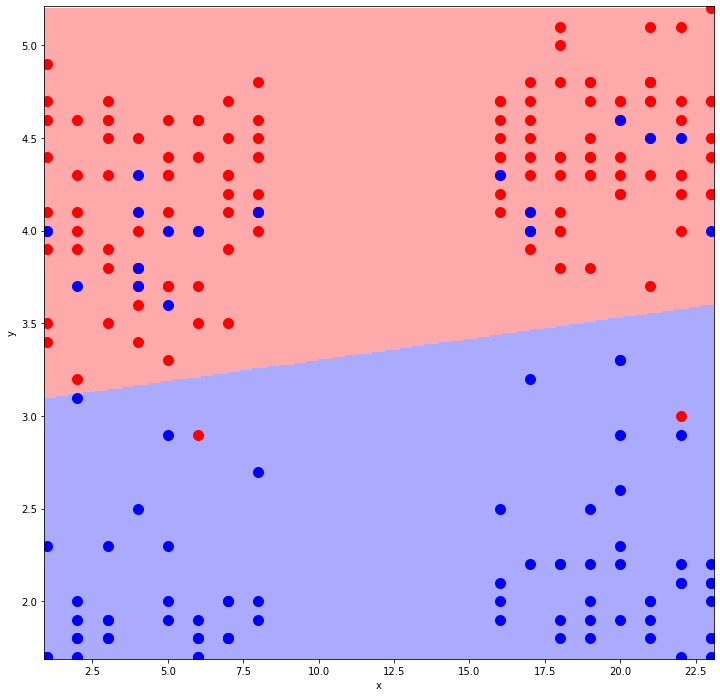

In [8]:
process_with_solver(X, y, 'gradient', 0.1, 0.01, debug_iters=1000)

alpha = 0.0001 f-score = 0.8494949990412785
alpha = 0.001 f-score = 0.8697058823529412
alpha = 0.01 f-score = 0.8653622735920139
alpha = 0.1 f-score = 0.5695517873092244
alpha = 1.0 f-score = 0.40182901698691176
Best params: 0.001 0.8697058823529412
errors = 34 steps = 8


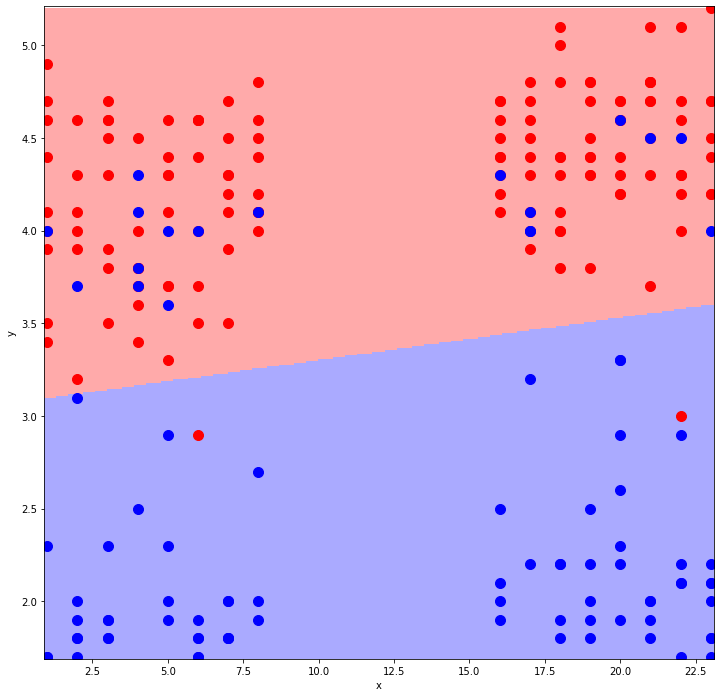

In [9]:
process_with_solver(X, y, 'newton', 0.1, 0.01)